In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# File paths
train_file = '../poker+hand/poker-hand-training-true.data'
test_file = '../poker+hand/poker-hand-testing.data'

In [ ]:
# Load training data (assumes comma-separated format)
train_data = np.loadtxt(train_file, delimiter=',')

# Convert to a DataFrame
columns = ['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'target'] # 
df_train = pd.DataFrame(train_data, columns=columns)

# Now you can inspect the data
print(df_train.head())

X_train = train_data[:, :-1]         # Features are then the first 10 columns, which are the card values
y_train = train_data[:, -1].astype(int)  #Target is the last column, which is the poker hand class

    S1    C1   S2    C2   S3    C3   S4    C4   S5    C5  target
0  1.0  10.0  1.0  11.0  1.0  13.0  1.0  12.0  1.0   1.0     9.0
1  2.0  11.0  2.0  13.0  2.0  10.0  2.0  12.0  2.0   1.0     9.0
2  3.0  12.0  3.0  11.0  3.0  13.0  3.0  10.0  3.0   1.0     9.0
3  4.0  10.0  4.0  11.0  4.0   1.0  4.0  13.0  4.0  12.0     9.0
4  4.0   1.0  4.0  13.0  4.0  12.0  4.0  11.0  4.0  10.0     9.0


In [ ]:
# Load the testing data
test_data = np.loadtxt(test_file, delimiter=',')
X_test = test_data[:, :-1]
y_test = test_data[:, -1].astype(int)

print("Training data shape:", X_train.shape, y_train.shape)
print("Testing data shape:", X_test.shape, y_test.shape)

Training data shape: (25010, 10) (25010,)
Testing data shape: (1000000, 10) (1000000,)


In [22]:
# 2. Create a Pipeline with StandardScaler and SVM
# The pipeline applies scaling before passing data to the SVM model.
pipeline = make_pipeline(StandardScaler(), SVC(random_state=42))

# 3. Define a Parameter Grid for Hyperparameter Tuning
param_grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': [1, 0.1, 0.01, 0.001],
    'svc__kernel': ['rbf']
}

In [24]:
# 4. Use the GridSearchCV import for Parameter Optimization and cross validation finding the best parameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=4)
print("Starting grid search...")
grid_search.fit(X_train, y_train)
print("Grid search complete.")

print("\nBest Parameters Found:")
print(grid_search.best_params_)
print("Best Cross-Validation Score: {:.4f}".format(grid_search.best_score_))

Starting grid search...


/Users/faheemmazhar/Library/Python/3.9/lib/python/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Grid search complete.

Best Parameters Found:
{'svc__C': 10, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}
Best Cross-Validation Score: 0.5580


In [25]:
# 5. Evaluate the Best Model on the Testing Set
y_pred = grid_search.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("\nTest Accuracy: {:.4f}".format(accuracy))
print("\nClassification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)



Test Accuracy: 0.5602

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.73      0.65    501209
           1       0.51      0.46      0.48    422498
           2       0.24      0.00      0.00     47622
           3       0.17      0.00      0.00     21121
           4       0.08      0.00      0.00      3885
           5       0.90      0.22      0.35      1996
           6       0.00      0.00      0.00      1424
           7       0.00      0.00      0.00       230
           8       0.00      0.00      0.00        12
           9       0.03      0.33      0.05         3

    accuracy                           0.56   1000000
   macro avg       0.25      0.17      0.15   1000000
weighted avg       0.53      0.56      0.53   1000000

Confusion Matrix:
[[366968 134207      4      0      2     26      0      0      0      2]
 [229661 192717     66      6      5     16      0      1      5     21]
 [ 19705  27869     35      9 

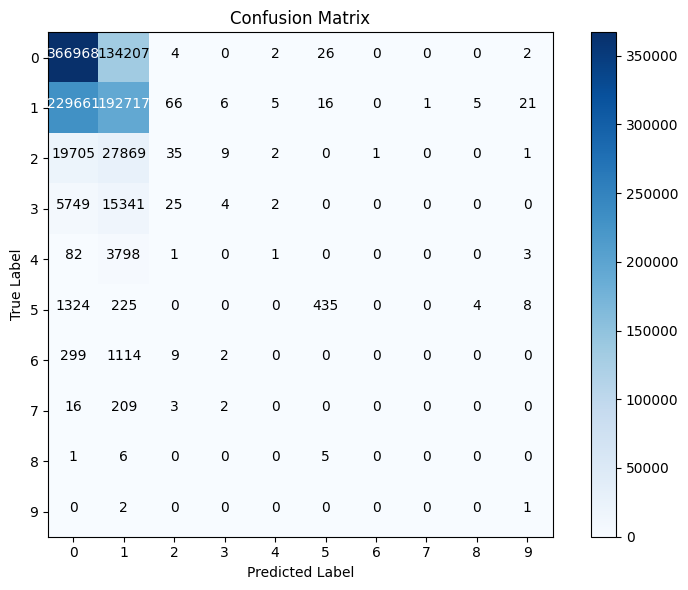

In [28]:
# 5. Visualize the Confusion Matrix using matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

# Assuming target labels are integers - adjust tick labels as needed.
classes = np.unique(y_test)
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

# Add labels and ticks
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

# Optionally add numbers in each cell
threshold = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > threshold else "black")

plt.tight_layout()
plt.show()

In [26]:
# # 6. Save the Best Model
# model_filename = 'svm_poker_model_gridsearch.pkl'
# with open(model_filename, 'wb') as file:
#     pickle.dump(grid_search.best_estimator_, file)
# print(f"\nModel saved to {model_filename}")


Model saved to svm_poker_model_gridsearch.pkl
